In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import datetime


# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')  # 'bmh'為使用的背景主題

In [ ]:
# 讀檔

df = pd.read_csv('100mountain.csv')
df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198399 entries, 0 to 198398
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   shopNumber           198399 non-null  int64 
 1   posNumber            198399 non-null  int64 
 2   transactionDate_NEW  198399 non-null  object
 3   transactionHour      198399 non-null  object
 4   serial               198399 non-null  int64 
 5   itemLine             198399 non-null  int64 
 6   memberID             185592 non-null  object
 7   member               185531 non-null  object
 8   invoice              188795 non-null  object
 9   productID            198399 non-null  object
 10  productName          198398 non-null  object
 11  brand                196032 non-null  object
 12  brandName            198399 non-null  object
 13  number               198399 non-null  int64 
 14  subtotal             198399 non-null  int64 
dtypes: int64(6), object(9)
memory usag

In [ ]:
# 格式轉換

df['transactionDate_NEW'] = df['transactionDate_NEW'].astype('datetime64')
df['number'] = df['number'].astype('int64')
df['subtotal'] = df['subtotal'].astype('int64')

df

In [ ]:
# 資料清洗 去除不需要的值

df = df[~(df['brand'] == '999')]
df = df[~(df['brandName'] == '其他品牌')]
df = df[~(df['brandName'] == '出清品')]

df

In [11]:
# 統計 各品牌銷售量  #

brandgroup = df.groupby(by='brandName').sum('subtotal').nlargest(15, 'subtotal')
brandgroup

,shopNumber,posNumber,serial,itemLine,number,subtotal
brandName,,,,,,
Snow Peak,20459,22466,452756,27666,12783,22704634
Fjallraven,14542,12181,221334,16855,7008,18527344
Hilleberg,2673,3147,29331,2566,1349,14963145
MAMMUT,7649,5726,193605,8620,3378,14517097
100mountain,45096,37413,852956,64683,68688,14260457
mont-bell,12850,11028,280246,15805,6057,13273142
Zamberlan,4504,3317,67507,4085,2041,11727168
MysteryRanch,5405,4224,79239,5110,2515,11591406
始祖鳥 Arcteryx,4182,3414,65130,5478,2008,9002190


In [15]:
# 前15名單

top15List = list(brandgroup.index[0:15])
print(top15List)

['Snow Peak', 'Fjallraven', 'Hilleberg', 'MAMMUT', '100mountain', 'mont-bell', 'Zamberlan', 'MysteryRanch', '始祖鳥 Arcteryx', 'Komperdell', 'OSPREY', 'TiiTent', 'Merrell', 'KEEN', 'Pajak 波蘭睡袋']


In [16]:
# 製作top15 dataframe

top15 = df[['transactionDate_NEW','brandName','subtotal']]   #觀察資料後發現，之後只需要這些欄位，在彙總top15前就可以先篩選好
top15 = top15[top15['brandName'].isin(top15List)]       #製作出只有top15資料的 dataframe
top15 

,transactionDate_NEW,brandName,subtotal
17,2020-01-01,Snow Peak,2250
18,2020-01-01,Snow Peak,1150
19,2020-01-01,Snow Peak,300
36,2020-01-01,Komperdell,1575
38,2020-01-01,100mountain,357
...,...,...,...
198371,2020-12-31,Zamberlan,8900
198373,2020-12-31,Pajak 波蘭睡袋,16000
198374,2020-12-31,100mountain,0
198375,2020-12-31,100mountain,0


In [17]:
import seaborn as sns
import pandas as pd

%matplotlib inline
pd.set_option("display.max_rows", 1000)    #設定最大能顯示1000rows
pd.set_option("display.max_columns", 1000) #設定最大能顯示1000columns

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
mpl.rcParams['axes.unicode_minus'] = False

In [27]:
top15['month'] = top15 ['transactionDate_NEW'].dt.month 
top15.head(100)

,transactionDate_NEW,brandName,subtotal,month
17,2020-01-01,Snow Peak,2250,1
18,2020-01-01,Snow Peak,1150,1
19,2020-01-01,Snow Peak,300,1
36,2020-01-01,Komperdell,1575,1
38,2020-01-01,100mountain,357,1
39,2020-01-01,Snow Peak,717,1
40,2020-01-01,mont-bell,1426,1
42,2020-01-01,mont-bell,1494,1
43,2020-01-01,mont-bell,1426,1
44,2020-01-01,Snow Peak,1050,1


# 各品牌、各月份銷售數量趨勢圖

       subtotal
month          
1       1128113
2       1586137
3       2107524
4       2422192
5       2134025
6       1907291
7       1319839
8       1412954
9       1707916
10      2247970
11      2391219
12      2339454
       subtotal
month          
1       1094756
2       1045991
3       1349449
4       1651468
5       1979474
6       1394344
7       1254141
8       1709134
9       1518915
10      2017078
11      1557644
12      1954950
       subtotal
month          
1        958123
2        593088
3        984262
4       1599624
5       2194986
6        958593
7       1830510
8       1192510
9       1451896
10      1020170
11       957958
12      1221425
       subtotal
month          
1        937143
2        828572
3       1046376
4       1078506
5       1166490
6       1138627
7        931958
8        967491
9       1341717
10      1453012
11      1638289
12      1988916
       subtotal
month          
1        439407
2        749231
3        864293
4        758207
5       

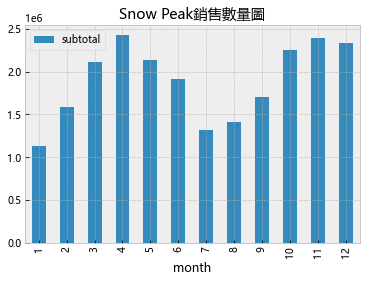

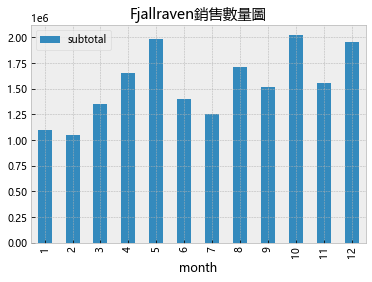

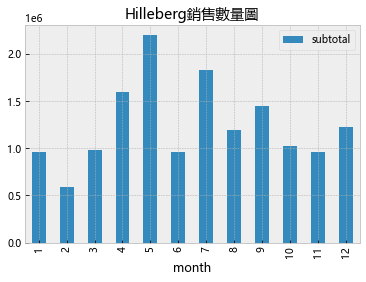

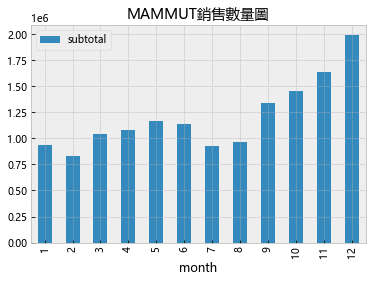

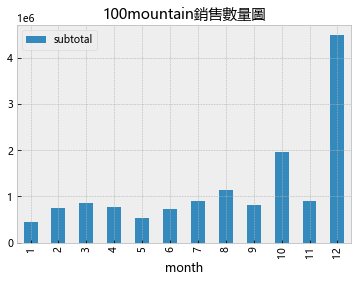

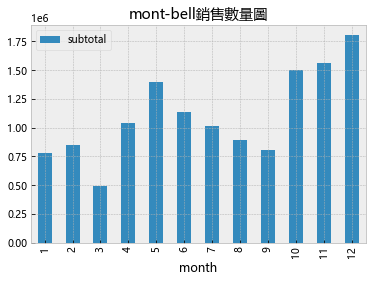

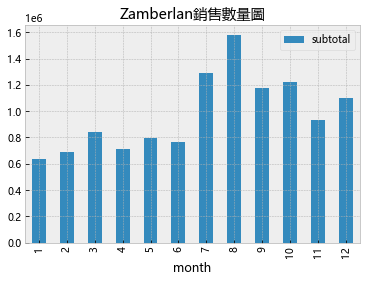

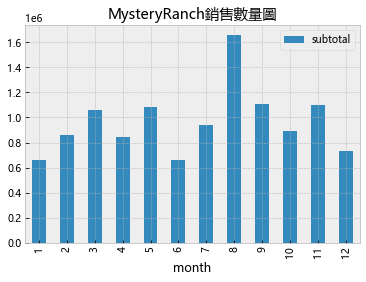

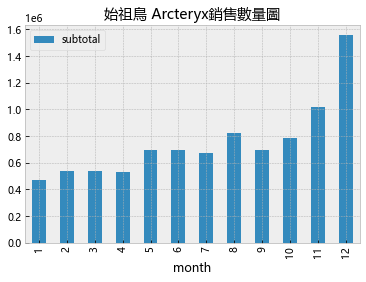

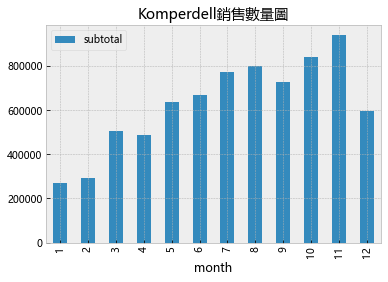

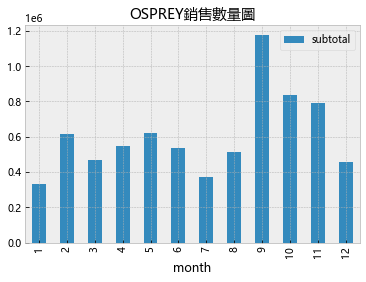

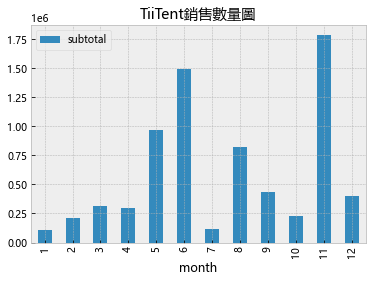

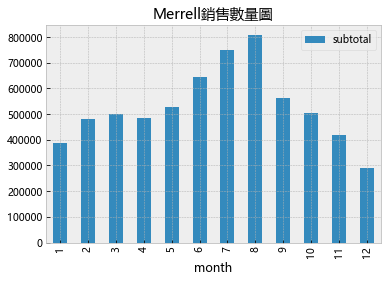

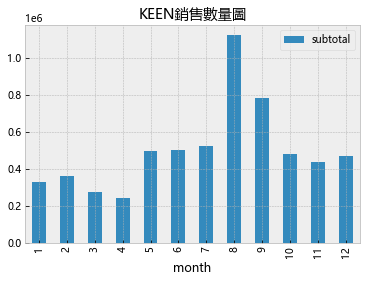

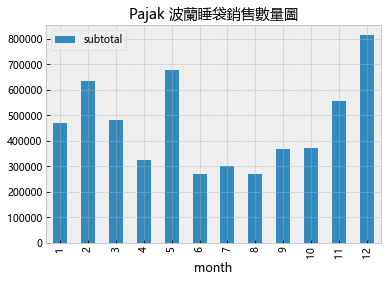

In [28]:
for i in range(len(top15List)):
    top15branddata = top15[top15['brandName'] == top15List[i]].groupby('month').sum('subtotal') 

    print(top15branddata)
    
    top15branddata.plot(kind='bar', y= {'subtotal':top15List[i]},title= '{}銷售數量圖'.format(top15List[i]))

# 另法

                     subtotal
transactionDate_NEW          
2020-01-31            1128113
2020-02-29            1586137
2020-03-31            2107524
2020-04-30            2422192
2020-05-31            2134025
2020-06-30            1907291
2020-07-31            1319839
2020-08-31            1412954
2020-09-30            1707916
2020-10-31            2247970
2020-11-30            2391219
2020-12-31            2339454
                     subtotal
transactionDate_NEW          
2020-01-31            1094756
2020-02-29            1045991
2020-03-31            1349449
2020-04-30            1651468
2020-05-31            1979474
2020-06-30            1394344
2020-07-31            1254141
2020-08-31            1709134
2020-09-30            1518915
2020-10-31            2017078
2020-11-30            1557644
2020-12-31            1954950
                     subtotal
transactionDate_NEW          
2020-01-31             958123
2020-02-29             593088
2020-03-31             984262
2020-04-30

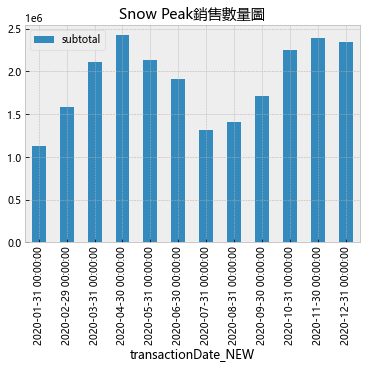

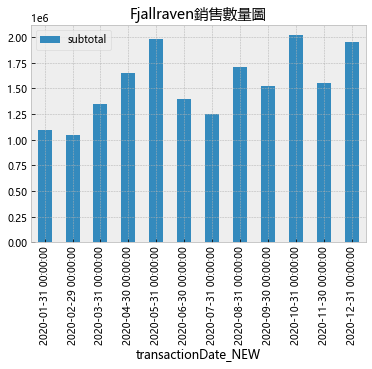

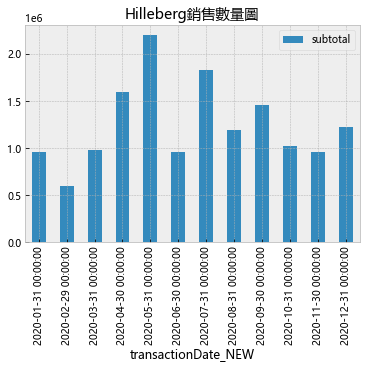

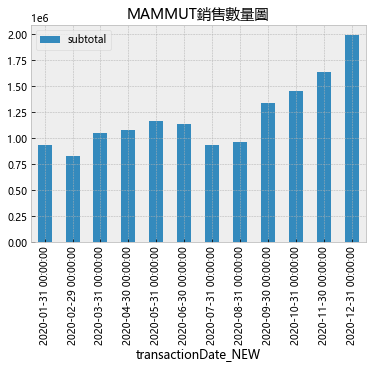

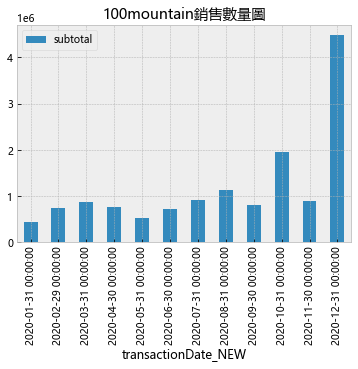

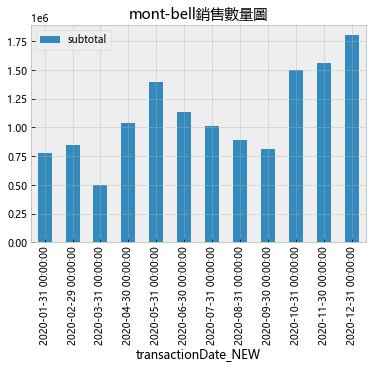

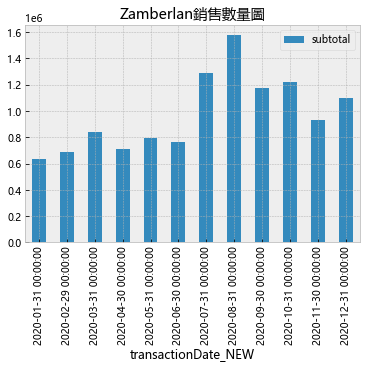

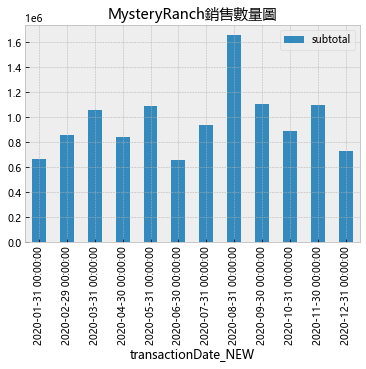

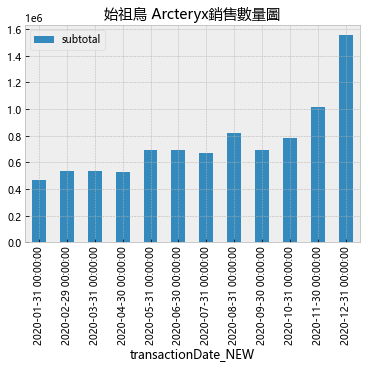

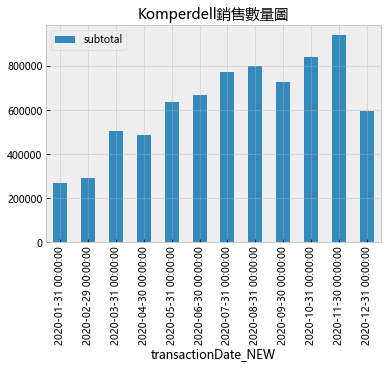

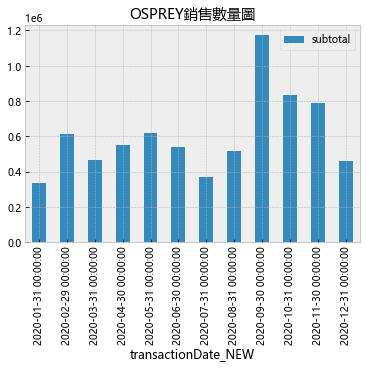

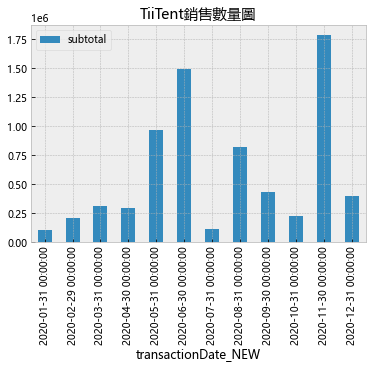

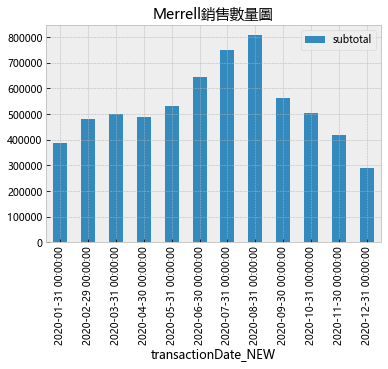

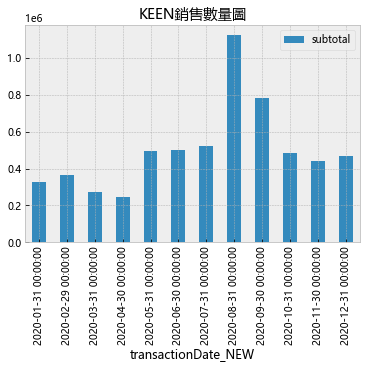

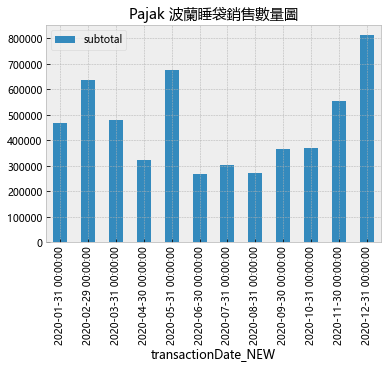

In [25]:
for i in range(len(top15List)):
    top15branddata = top15[top15['brandName'] == top15List[i]].groupby('transactionDate_NEW').sum('subtotal') #.resample('D',level=0).sum()
    top15branddata = top15branddata.resample('M',level=0).sum()
   
    
    print(top15branddata)
    
    top15branddata.plot(kind='bar', y= {'subtotal':top15List[i]},title= '{}銷售數量圖'.format(top15List[i]))